In [ ]:
!pip install pafy
!pip install youtube-dl
#!pip uninstall -y opencv-python opencv-contrib-python
#!apt install python3-opencv

In [1]:
# widgets Tool
 
import ipywidgets as widgets
from IPython.display import clear_output
from IPython.display import Javascript, display
import uuid

style = {'description_width': '250px'}
layout = {'width': '500px'}
 
def addVisText(key='',value='',disabled=False, layout=layout):
    text = widgets.Text(description = key,value = value, style=style, layout=layout,disabled=disabled)
    display(text)  
    return text
    
def addVisCheckbox(key='',value=False,disabled=False):
    text = widgets.Checkbox(description = key,value = value,disabled=disabled, style=style, layout=layout)
    display(text)   
    return text

def addHeader(text='', bold=True):
    if bold == True:
        html = widgets.HTML(
        value="<b>" + text + "</b>",
        description=' ',
        style=style, layout=layout
        )
    else:
        html = widgets.HTML(
        value=text,
        description=' ',
        style=style, layout=layout
        )
    display(html)    

In [2]:
#!pip install opencv-python
#!python -m pip install imutils
import cv2
import numpy as np
from PIL import Image

from IPython.display import display, clear_output
from PIL import ImageChops
import time

import numpy as np
from base.image_tool  import ImageTool
import io

def getByteArray(image):    
    img_byte_arr = io.BytesIO()
    image.save(img_byte_arr, format='PNG')
    img_byte_arr = img_byte_arr.getvalue()
    return img_byte_arr

In [180]:
import pafy
import cv2
import time

# Shibuya Scramble Crossing Live Camera
url = "https://www.youtube.com/watch?v=lkIJYc4UH60"

#train
url = "https://www.youtube.com/watch?v=SRBLN7GEgY8"
   
# hongkong tram    
url = "https://www.youtube.com/watch?v=xlYniSPph4U"    
    
# london bus    
url = "https://www.youtube.com/watch?v=eNSxNEwjRd8"    
    
#EarthCam Live:  Times Square in 4K 2021-03-01 17:36
url = "https://youtu.be/eJ7ZkQ5TC08"

url = "https://youtu.be/XF4G5APigCc"
video = pafy.new(url)
print(video.title,video.streams)

Avenida do Mar Crosswalk Live Cam 2021-03-02 13:58 [normal:mp4@256x144, normal:mp4@426x240, normal:mp4@640x360, normal:mp4@854x480, normal:mp4@1280x720, normal:mp4@1920x1080]


In [143]:
video.title.rsplit('2021')[0].rstrip()

'Avenida do Mar Crosswalk Live Cam'

In [191]:
best = video.getbest(preftype="mp4")
#best = video.streams[3]


def videoLoop(best,action=None, skipframes=0):
    capture = cv2.VideoCapture(best.url)
    framecounter = 0
    skipcounter = skipframes

    try: 
        while True:
            start_time = time.time() # start time of the loop
            grabbed, frame = capture.read()
           
            #image = Image.fromarray(frame)
            global image
            image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            
            if action != None:
                action(image)
            
            #image = image.crop((200, 200, 600, 600))
            if (renderw.value == True) and (skipcounter == 0):
                print('render')
                image_w.value = getByteArray(image)

            fpsw.value = str(round( 1.0 / (time.time() - start_time),2)) # FPS = 1 / time to process loop
            sizew.value = str(image.size)
            framew.value = str(framecounter)
            framecounter=framecounter + 1
            
            skipcounter -= 1
            if skipcounter < 0:
                skipcounter = skipframes
                
            break;    
            time.sleep(1/30)
            
    except Exception as e:
        print('done')
        print(str(e))

In [192]:
def action1(args):
    print(args)
    
vstreams=[]
for stream in video.streams:
    videoLoop(stream)
    #vstreams.append(image_w.value)
    vstreams.append(image)

In [187]:
len(vstreams)

6

In [ ]:
len(vstreams)
#image_w.value = vstreams[4]
image = vstreams[5]
image

In [ ]:
type(video.streams)
w = widgets.Dropdown(
    options=video.streams,
    value=video.streams[0],
    description='Task:',
)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        #print(type(change['new']))
        #print("changed to %s" % change['new'])
        videoLoop(change['new'])

w.observe(on_change)

display (w)

print(video.streams[0].resolution)
image_w = ipywidgets.Image(format='jpeg')
display(image_w)

In [31]:
import ipywidgets
from IPython.display import display

fpsw    = addVisText(key='fps', disabled=True)
framew    = addVisText(key='frame', disabled=True)
sizew    = addVisText(key='size', disabled=True)
renderw = addVisCheckbox(key='render',value=True)

image_w = ipywidgets.Image(format='jpeg')
display(image_w)

Text(value='', description='fps', disabled=True, layout=Layout(width='500px'), style=DescriptionStyle(descript…

Text(value='', description='frame', disabled=True, layout=Layout(width='500px'), style=DescriptionStyle(descri…

Text(value='', description='size', disabled=True, layout=Layout(width='500px'), style=DescriptionStyle(descrip…

Checkbox(value=True, description='render', layout=Layout(width='500px'), style=DescriptionStyle(description_wi…

Image(value=b'', format='jpeg')

In [381]:
def crop_image():
    global cropped_image
    #print(cropArea)
    cropped_image = image.crop(cropArea)
    image_w.value = getByteArray(cropped_image)

def toNormalizedValue(value,size):
    return float (value) / size

def fromNormalizedValue(value,size):
    return int(value * size)
    
def toNormalizedMinMax(values,size):    
    xmin = toNormalizedValue(values[0],size[0])
    ymin = toNormalizedValue(values[1],size[1])
    xmax = toNormalizedValue(values[2],size[0])
    ymax = toNormalizedValue(values[3],size[1])
    return (xmin,ymin,xmax,ymax)    
    
def fromNormalizedMinMax(values,size):    
    xmin = fromNormalizedValue(values[0],size[0])
    ymin = fromNormalizedValue(values[1],size[1])
    xmax = fromNormalizedValue(values[2],size[0])
    ymax = fromNormalizedValue(values[3],size[1])
    return [xmin,ymin,xmax,ymax]
     
def on_value_change_crop_xmin(change):
    cropx1.min  = change['new']
    cropArea[0] = change['new']
    crop_image()
            
def on_value_change_crop_xmax(change):
    cropx0.max  = change['new']
    cropArea[2] = change['new']
    crop_image()
    
def on_value_change_crop_ymin(change):
    cropy1.min  = change['new']
    cropArea[1] = change['new']
    crop_image()
            
def on_value_change_crop_ymax(change):
    cropy0.max  = change['new']
    cropArea[3] = change['new']
    crop_image()    
    
def initMinMax(size,cropArea):
    cropx0.max = size[0]
    cropx1.max = size[0]
    cropy0.max = size[1]
    cropy1.max = size[1]
    
    cropx0.value = cropArea[0]
    cropy0.value = cropArea[1]
    cropx1.value = cropArea[2]
    cropy1.value = cropArea[3]

cropNormalizedArea = [0.0,0.0,1.0,1.0]    
bookmark_dict = dict()
bookmark_dict['reset'] = cropNormalizedArea

In [387]:
out = widgets.Output()

cropx0 = widgets.IntSlider(value=0, min=0,max=image.size[0],step=1, description='x0',layout=layout)
cropx1 = widgets.IntSlider(value=image.size[0], min=0,max=image.size[0],step=1, description='x1',layout=layout)
cropx0.observe(on_value_change_crop_xmin, 'value')
cropx1.observe(on_value_change_crop_xmax, 'value')

cropy0 = widgets.IntSlider(value=0, min=0,max=image.size[1],step=1, description='y0',layout=layout)
cropy1 = widgets.IntSlider(value=image.size[1], min=0,max=image.size[1],step=1, description='y1',layout=layout)
cropy0.observe(on_value_change_crop_ymin, 'value')
cropy1.observe(on_value_change_crop_ymax, 'value')


def on_value_submit_crop_name(change):
    print(change)
    if change.value not in crop_list.options:
        crop_list.options = list(crop_list.options) + [change.value] 
    bookmark_dict[change.value] = toNormalizedMinMax(cropArea,image.size)
    crop_list.value = change.value
    
def crop_list_on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        #print(bookmark_dict[change['new']])
        #initMinMax(image.size,bookmark_dict[change['new']])
        values = fromNormalizedMinMax(bookmark_dict[change['new']],image.size)
        initMinMax(image.size,values)
        crop_name.value = change['new']
        
def on_reset_button_clicked(b):
    cropArea      = [0,0,image.size[0],image.size[1]]
    initMinMax(image.size,cropArea)
    crop_name.value = ''
    #crop_list.value = ''
    
reset_button = widgets.Button(description='Reset', disabled=False, tooltip='reset all values',style=style)
reset_button.on_click(on_reset_button_clicked)  

crop_name = widgets.Text(description = 'name',value = '', style=style, layout=layout,disabled=False)
crop_list = widgets.Dropdown(#options=video.streams,#value=video.streams[0], 
    description='bookmarks')
crop_bookmarks = widgets.HBox([crop_list,crop_name,reset_button])
crop_name.on_submit(on_value_submit_crop_name)
crop_list.observe(crop_list_on_change) 

crop_hbox_x = widgets.HBox([cropx0, cropx1])
crop_hbox_y = widgets.HBox([cropy0, cropy1])
crop_vbox   = widgets.VBox([crop_bookmarks,crop_hbox_x, crop_hbox_y, out])

tab  = widgets.Tab(children = [crop_vbox])
tab.set_title(0, 'crop')

#print(image.size[0])
image_w = ipywidgets.Image(format='PNG')

# select image slider
def on_value_change_imageselectw(change):
    imageselectw.disabled=True
    global image,cropArea
    newimage = vstreams[change['new']]
    newsize = newimage.size
    to = toNormalizedMinMax(cropArea,image.size)
    cropArea = fromNormalizedMinMax(to,newimage.size)
    imagea = newimage.crop(cropArea)
    image = newimage
    initMinMax(newsize,cropArea)
    imageselectw.disabled=False
    
imageselectw = widgets.IntSlider(value=0, min=0,max=len(vstreams)-1,step=1, description='image',layout=layout)
display(imageselectw)
imageselectw.observe(on_value_change_imageselectw, 'value')

display (tab)
display(image_w)

# init first image
image = vstreams[0]
cropArea      = [0,0,image.size[0],image.size[1]]
image_w.value = getByteArray(image)
initMinMax(image.size,cropArea)
cropped_image = image
crop_list.options = bookmark_dict.keys()

IntSlider(value=0, description='image', layout=Layout(width='500px'), max=5)

Image(value=b'', format='PNG')

In [385]:
cropped_image
#del bookmark_dict['change.value']
bookmark_dict.keys()
bookmark_dict

In [363]:
#nitMinMax(image.size,fromNormalizedMinMax(bookmark_dict['test1'],image.size))
#fromNormalizedMinMax(bookmark_dict['test2'],image.size)
#on_reset_button_clicked('')
values = fromNormalizedMinMax(bookmark_dict['test2'],image.size)
initMinMax(image.size,values)

In [379]:
if 'tree2' not in crop_list.options:
    print('not')
    
    
crop_list.options    

('reset', 'tree', 'tree2', 'tree3')

In [250]:
print(image.size, cropArea)
initMinMax(image.size,cropArea)
size = image.size
cropx0.max = size[0]
cropx1.max = size[0]
cropy0.max = size[1]
cropy1.max = size[1]

cropx0.value = cropArea[0]
cropy0.value = cropArea[1]
cropx1.value = cropArea[2]
cropy1.value = cropArea[3]
cropx1.value,cropArea[2]

(1920, 1080) [316, 541, 1111, 1080]


(1111, 1111)

(870, 449) (640, 330)
v (0, 80)
(640, 330) (640, 490)


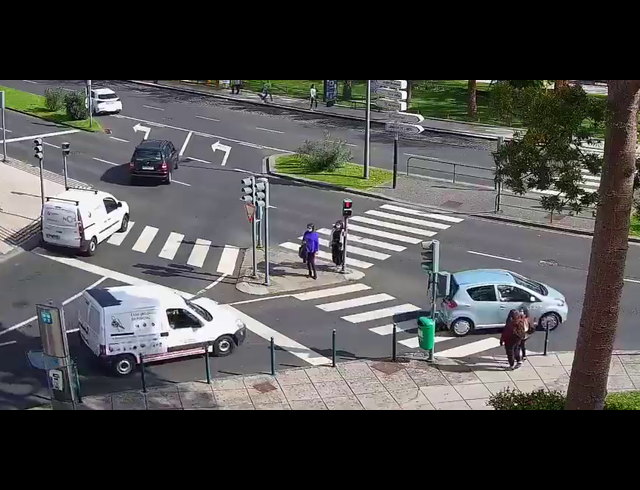

In [286]:
#https://stackoverflow.com/questions/44070427/whats-the-difference-between-various-image-resizing-algorithms-in-the-module-of

#imagea.resize((640,480),Image.ANTIALIAS)
#imagea.resize((640,480),Image.NEAREST)

imagea = cropped_image

w= 640 
h= 480
h= 490

ratio = h / imagea.size[1]
newsize = (int(ratio * imagea.size[0]), int(ratio * imagea.size[1]) )

ratio = w / imagea.size[0]
h2 = int(ratio * imagea.size[1])
w2 = int(ratio * imagea.size[0])
if h2 > h:
    ratio = h / imagea.size[1]
    h2 = int(ratio * imagea.size[1])
    w2 = int(ratio * imagea.size[0])
newsize = (w2, h2 )

print(imagea.size,newsize)

imageb = imagea.resize(newsize,Image.LANCZOS)
#imageb = imagea.resize((640,480),Image.LANCZOS)
#imagea.thumbnail((80, 80), Image.ANTIALIAS)

new_size = (w, h)

v = (int((new_size[0]-imageb.size[0])/2), int((new_size[1]-imageb.size[1])/2))
print('v',v)

new_im = Image.new("RGB", new_size)   ## luckily, this is already black!
new_im.paste(imageb, v)

print(imageb.size,new_im.size)
imageb
new_im

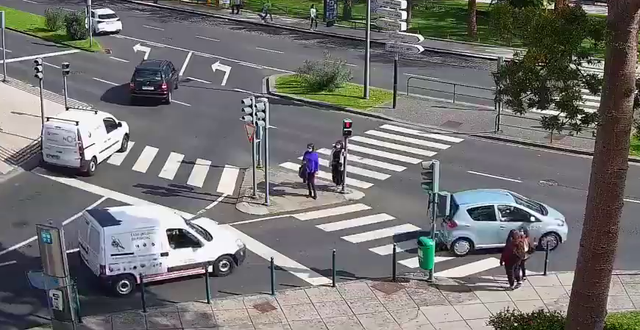

In [281]:
imageb

In [ ]:
import ipywidgets as widgets

out = widgets.Output()
def on_value_change(change):
    with out:
        print(change['new'])

slider = widgets.IntSlider(min=1, max=100, step=1, continuous_update=True)
play = widgets.Play(min=1, interval=2000)

slider.observe(on_value_change, 'value')
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.VBox([play, slider, out])

In [48]:
def f(a, b):
    imagea = image.crop((200, 200, 600 + a, 600 + b))
    image_w.value = getByteArray(imagea)
    print(a,b)
    return
w = widgets.interactive(f, a=100, b=100)
display(w)

interactive(children=(IntSlider(value=100, description='a', max=300, min=-100), IntSlider(value=100, descripti…

In [ ]:
image_w.value = getByteArray(image)

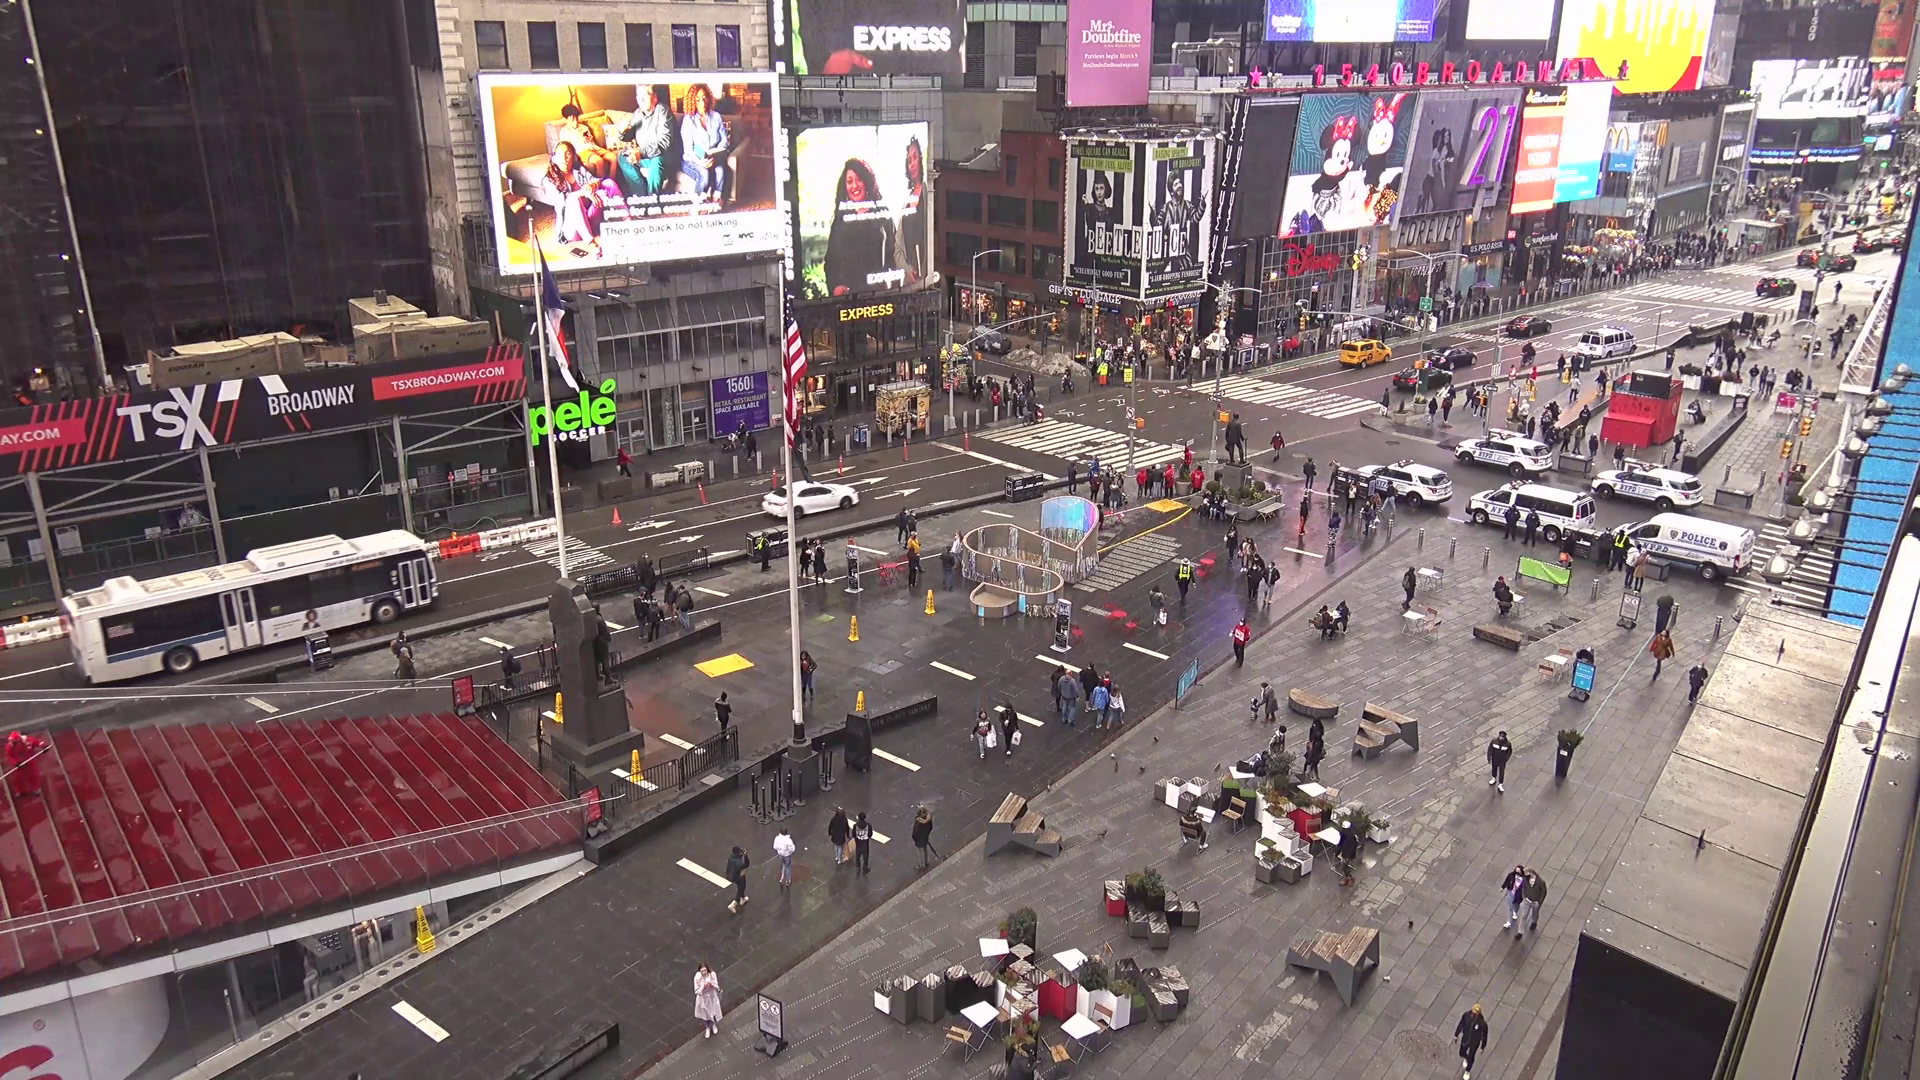

In [41]:
#img = ImageTool(image=image)
#image.crop((200, 200, 600, 600))
image

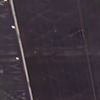

In [22]:
img.crop(0,0,100,100)
img.image

In [ ]:
import io
img_byte_arr = io.BytesIO()
img.image.save(img_byte_arr, format='PNG')
img_byte_arr = img_byte_arr.getvalue()
image_w.value = img_byte_arr

In [ ]:
fpsw    = addVisText(key='fps')
renderw = addVisCheckbox(key='',value=True)
box = widgets.Checkbox(False, description='checker')
display(box)

def changed(b):
    fpsw.value = str(box.value)
    #print(b)

renderw.observe(changed)
box.observe(changed)

In [ ]:
import threading
from IPython.display import display
import ipywidgets as widgets
def f(a, b):
    return

w = widgets.interactive(f, a=10, b=20)

def work(w):
    for ii in range(10):
        time.sleep(1)
        print(w.kwargs, w.result)

thread = threading.Thread(target=work, args=(w,))
display(w)
#thread.start()

In [ ]:
import enum
import cv2
#from .jpeg_encoder import JpegEncoder
import JpegEncoder

_ENCODER = JpegEncoder(width=224, height=224, fps=21)


def bgr8_to_jpeg_gst(value):
    return _ENCODER.encode(value)


def bgr8_to_jpeg(value, quality=75):
    return bytes(cv2.imencode('.jpg', value)[1])
image_w.value = bgr8_to_jpeg(image[:, ::-1, :])

In [ ]:
type(frame)
sizey=480
image = Image.fromarray(frame)
img = ImageTool(image=image,h=sizey)
#display(img.image)
clear_output(wait=True)
print('2')
#display(img.image)